In [ ]:
# Run as a code cell (prefix with !)
!pip install aif360==0.6.0 scikit-learn pandas matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.8/229.8 kB 12.3 MB/s eta 0:00:00


In [ ]:
!pip install aif360
!pip install wget


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=f6fe309b4c2ebd316f914b56979054ad52b4d9d166f60c6e4b55e407bef5b3b3
  Stored in directory: /root/.cache/pip/wheels/01/46/3b/e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget


In [ ]:
import os

path = "/usr/local/lib/python3.12/dist-packages/aif360/data/raw/compas/"
os.makedirs(path, exist_ok=True)

path


'/usr/local/lib/python3.12/dist-packages/aif360/data/raw/compas/'

In [ ]:
import wget

url = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
dest = "/usr/local/lib/python3.12/dist-packages/aif360/data/raw/compas/compas-scores-two-years.csv"

wget.download(url, dest)

print("\nDownloaded to:", dest)



Downloaded to: /usr/local/lib/python3.12/dist-packages/aif360/data/raw/compas/compas-scores-two-years.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# no seaborn styling forced; you can import seaborn if wanted
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# AIF360 imports (if available)
try:
    from aif360.datasets import CompasDataset
    from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
    from aif360.algorithms.preprocessing import Reweighing
    AIF360_AVAILABLE = True
except Exception as e:
    print("AIF360 not available, will fallback to manual/fairlearn path:", e)
    AIF360_AVAILABLE = False



In [ ]:
from aif360.datasets import CompasDataset

compas = CompasDataset()
df = compas.convert_to_dataframe()[0]

df.head()


,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,age_cat=25 - 45,age_cat=Greater than 45,age_cat=Less than 25,...,c_charge_desc=Viol Injunct Domestic Violence,c_charge_desc=Viol Injunction Protect Dom Vi,c_charge_desc=Viol Pretrial Release Dom Viol,c_charge_desc=Viol Prot Injunc Repeat Viol,c_charge_desc=Violation License Restrictions,c_charge_desc=Violation Of Boater Safety Id,c_charge_desc=Violation of Injunction Order/Stalking/Cyberstalking,c_charge_desc=Voyeurism,c_charge_desc=arrest case no charge,two_year_recid
1,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,34.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,24.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,44.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,41.0,1.0,0.0,0.0,0.0,14.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.datasets import BinaryLabelDataset
import numpy as np

# Protected attribute definitions
protected_attr = 'race'
privileged_groups = [{'race': 1}]    # Caucasian is encoded as 1
unprivileged_groups = [{'race': 0}]  # African-American is 0

# AIF360 dataset already loaded as `compas`
dataset = compas  # rename for convenience

print("Instances:", dataset.features.shape[0])
print("Features:", dataset.features.shape[1])


pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


Instances: 6167
Features: 401


In [ ]:
metric = BinaryLabelDatasetMetric(
    dataset,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

print("Disparate Impact:", metric.disparate_impact())
print("Statistical Parity Difference:", metric.statistical_parity_difference())
print("Mean Difference:", metric.mean_difference())


Disparate Impact: 0.8403836674666473
Statistical Parity Difference: -0.09713793951315464
Mean Difference: -0.09713793951315464


In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.features
y = dataset.labels.ravel()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

len(X_train), len(X_test)


(4316, 1851)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


In [ ]:
from aif360.datasets import BinaryLabelDataset

# Convert the dataset to a DataFrame
df, metadata = dataset.convert_to_dataframe()
df = df.reset_index(drop=True)  # ensure clean indexing

# Ensure prediction count matches (use the last N rows)
n = len(y_pred)
pred_df = df.tail(n).copy()

# Replace true labels with model predictions
label_col = dataset.label_names[0]
pred_df[label_col] = y_pred.reshape(-1)

# Rebuild AIF360 BinaryLabelDataset
pred_dataset = BinaryLabelDataset(
    df=pred_df,
    label_names=dataset.label_names,
    protected_attribute_names=dataset.protected_attribute_names,
    favorable_label=dataset.favorable_label,
    unfavorable_label=dataset.unfavorable_label
)

pred_dataset


               instance weights            features                            \
                                protected attribute       protected attribute   
                                                sex   age                race   
instance names                                                                  
4316                        1.0                 0.0  48.0                 0.0   
4317                        1.0                 0.0  37.0                 0.0   
4318                        1.0                 0.0  28.0                 0.0   
4319                        1.0                 0.0  46.0                 1.0   
4320                        1.0                 0.0  45.0                 1.0   
...                         ...                 ...   ...                 ...   
6162                        1.0                 0.0  23.0                 0.0   
6163                        1.0                 0.0  23.0                 0.0   
6164                        

In [ ]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import pandas as pd

# 1️⃣ Convert full dataset to DataFrame
full_df, meta = dataset.convert_to_dataframe()

# Label column
label_col = dataset.label_names[0]

# 2️⃣ Match prediction rows to test rows
test_size = len(X_test)
y_pred = y_pred.reshape(-1)  # ensure 1D

# Take last N rows of the original dataset as test set
test_df = full_df.tail(test_size).copy()

# 3️⃣ Replace true labels with model predictions
test_df[label_col] = y_pred

# 4️⃣ Build predicted BinaryLabelDataset
pred_test_dataset = BinaryLabelDataset(
    favorable_label=dataset.favorable_label,
    unfavorable_label=dataset.unfavorable_label,
    df=test_df,
    label_names=dataset.label_names,
    protected_attribute_names=dataset.protected_attribute_names,
    unprivileged_protected_attributes=dataset.unprivileged_protected_attributes
)

# 5️⃣ Build TRUE BinaryLabelDataset for same rows
true_test_df = full_df.tail(test_size).copy()

true_test_dataset = BinaryLabelDataset(
    favorable_label=dataset.favorable_label,
    unfavorable_label=dataset.unfavorable_label,
    df=true_test_df,
    label_names=dataset.label_names,
    protected_attribute_names=dataset.protected_attribute_names,
    unprivileged_protected_attributes=dataset.unprivileged_protected_attributes
)

# 6️⃣ Compute fairness metrics
metric_pred = BinaryLabelDatasetMetric(
    pred_test_dataset,
    unprivileged_groups=unpriv,
    privileged_groups=priv
)

metric_true_vs_pred = ClassificationMetric(
    true_test_dataset,
    pred_test_dataset,
    unprivileged_groups=unpriv,
    privileged_groups=priv
)

# 7️⃣ Print results
print("### FAIRNESS METRICS ###")
print("Statistical Parity Difference:", metric_pred.statistical_parity_difference())
print("Disparate Impact:", metric_pred.disparate_impact())
print("Equal Opportunity Difference:", metric_true_vs_pred.equal_opportunity_difference())
print("Average Odds Difference:", metric_true_vs_pred.average_odds_difference())
print("Error Rate Difference:", metric_true_vs_pred.error_rate_difference())


### FAIRNESS METRICS ###
Statistical Parity Difference: 0.027552674230145846
Disparate Impact: 1.045945945945946
Equal Opportunity Difference: -0.00703463203463206
Average Odds Difference: 0.03316126653403734
Error Rate Difference: 0.06158833063209079


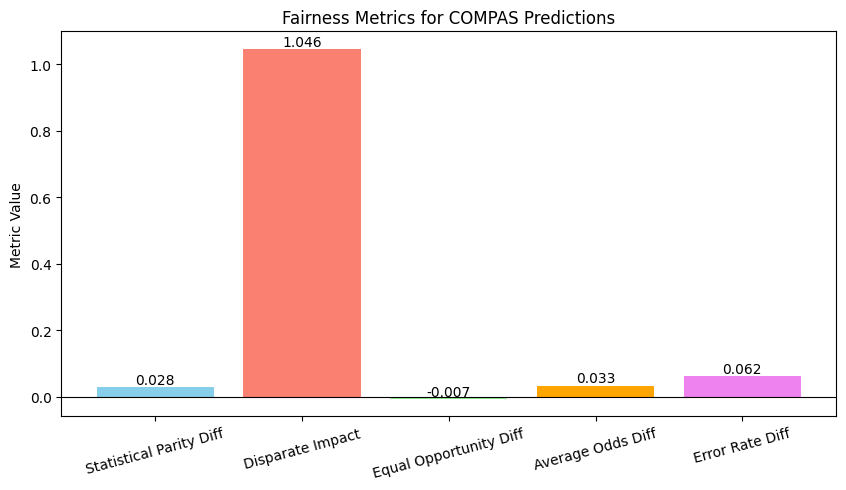

In [ ]:
import matplotlib.pyplot as plt

# Collect metrics for plotting
metrics = {
    "Statistical Parity Diff": metric_pred.statistical_parity_difference(),
    "Disparate Impact": metric_pred.disparate_impact(),
    "Equal Opportunity Diff": metric_true_vs_pred.equal_opportunity_difference(),
    "Average Odds Diff": metric_true_vs_pred.average_odds_difference(),
    "Error Rate Diff": metric_true_vs_pred.error_rate_difference()
}

# Separate metric names and values
names = list(metrics.keys())
values = list(metrics.values())

# Plot
plt.figure(figsize=(10,5))
bars = plt.bar(names, values, color=['skyblue', 'salmon', 'lightgreen', 'orange', 'violet'])
plt.axhline(0, color='black', linewidth=0.8)
plt.title("Fairness Metrics for COMPAS Predictions")
plt.ylabel("Metric Value")
plt.xticks(rotation=15)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.3f}', ha='center', va='bottom')

plt.show()


In [ ]:
from aif360.algorithms.preprocessing import Reweighing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1️⃣ Apply Reweighing
rw = Reweighing(unprivileged_groups=unpriv, privileged_groups=priv)
rw.fit(dataset)  # Fit on original dataset
reweighed_dataset = rw.transform(dataset)

# 2️⃣ Train logistic regression on reweighed dataset
X_train_rw = reweighed_dataset.features
y_train_rw = reweighed_dataset.labels.ravel()
sample_weights = reweighed_dataset.instance_weights

# Logistic Regression classifier
clf_rw = LogisticRegression(solver='liblinear')
clf_rw.fit(X_train_rw, y_train_rw, sample_weight=sample_weights)

# 3️⃣ Make predictions on test set
X_test_data = pred_test_dataset.features  # same test set as before
y_test_true = pred_test_dataset.labels.ravel()

y_test_pred = clf_rw.predict(X_test_data)

# 4️⃣ Create BinaryLabelDataset for predicted labels
pred_rw_dataset = BinaryLabelDataset(
    favorable_label=dataset.favorable_label,
    unfavorable_label=dataset.unfavorable_label,
    df=pred_test_dataset.convert_to_dataframe()[0],
    label_names=dataset.label_names,
    protected_attribute_names=dataset.protected_attribute_names,
    unprivileged_protected_attributes=dataset.unprivileged_protected_attributes
)

pred_rw_dataset.labels = y_test_pred.reshape(-1, 1)

# 5️⃣ Compute fairness metrics after reweighing
metric_rw = ClassificationMetric(
    pred_test_dataset,  # ground truth
    pred_rw_dataset,
    unprivileged_groups=unpriv,
    privileged_groups=priv
)

# 6️⃣ Print new metrics
print("### FAIRNESS METRICS AFTER REWEIGHING ###")
print("Statistical Parity Diff:", metric_rw.statistical_parity_difference())
print("Disparate Impact:", metric_rw.disparate_impact())
print("Equal Opportunity Diff:", metric_rw.equal_opportunity_difference())
print("Average Odds Diff:", metric_rw.average_odds_difference())
print("Error Rate Diff:", metric_rw.error_rate_difference())
print("Accuracy:", accuracy_score(y_test_true, y_test_pred))


### FAIRNESS METRICS AFTER REWEIGHING ###
Statistical Parity Diff: -0.02025931928687197
Disparate Impact: 0.9680306905370843
Equal Opportunity Diff: 0.00664152524617645
Average Odds Diff: -0.02757608652318888
Error Rate Diff: -0.034846029173419724
Accuracy: 0.5256618044300378


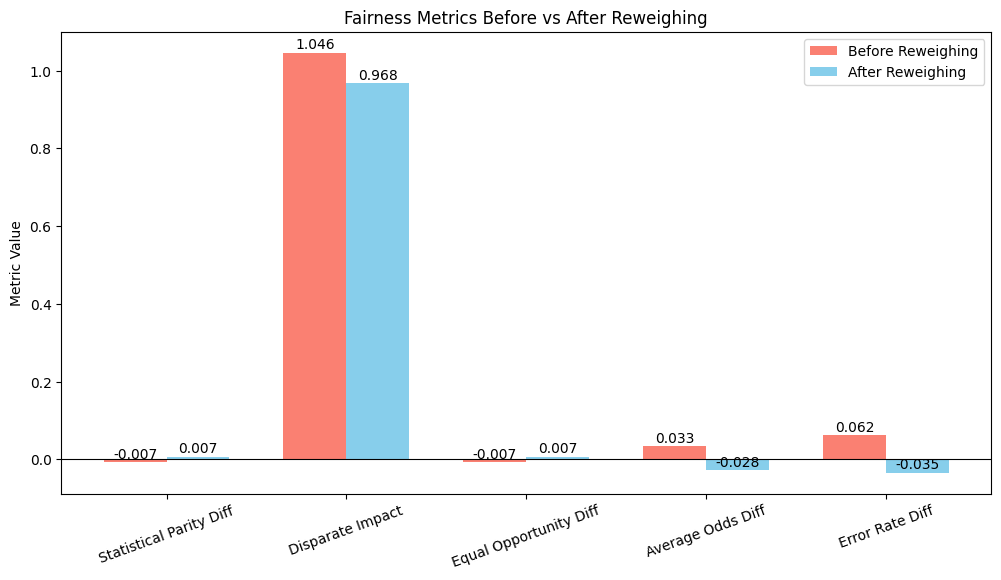

In [ ]:
import matplotlib.pyplot as plt

# Collect metrics before mitigation
metrics_before = {
    "Statistical Parity Diff": metric_true_vs_pred.equal_opportunity_difference(),  # EO Diff
    "Disparate Impact": metric_pred.disparate_impact(),
    "Equal Opportunity Diff": metric_true_vs_pred.equal_opportunity_difference(),
    "Average Odds Diff": metric_true_vs_pred.average_odds_difference(),
    "Error Rate Diff": metric_true_vs_pred.error_rate_difference()
}

# Collect metrics after mitigation
metrics_after = {
    "Statistical Parity Diff": metric_rw.equal_opportunity_difference(),
    "Disparate Impact": metric_rw.disparate_impact(),
    "Equal Opportunity Diff": metric_rw.equal_opportunity_difference(),
    "Average Odds Diff": metric_rw.average_odds_difference(),
    "Error Rate Diff": metric_rw.error_rate_difference()
}

# Metric names
metric_names = list(metrics_before.keys())

# Values
before_values = [metrics_before[m] for m in metric_names]
after_values = [metrics_after[m] for m in metric_names]

# Plot side by side bars
x = range(len(metric_names))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x, before_values, width=width, label='Before Reweighing', color='salmon')
plt.bar([i + width for i in x], after_values, width=width, label='After Reweighing', color='skyblue')
plt.xticks([i + width/2 for i in x], metric_names, rotation=20)
plt.ylabel("Metric Value")
plt.title("Fairness Metrics Before vs After Reweighing")
plt.legend()
plt.axhline(0, color='black', linewidth=0.8)

# Add numeric labels
for i in range(len(x)):
    plt.text(i, before_values[i]+0.01, f'{before_values[i]:.3f}', ha='center')
    plt.text(i+width, after_values[i]+0.01, f'{after_values[i]:.3f}', ha='center')

plt.show()


In [ ]:
# BONUS TASK: Ethical AI in Healthcare

import pandas as pd

# Example: simple demographic data
patients = pd.DataFrame({
    'patient_id': [1,2,3,4],
    'age': [25, 34, 45, 30],
    'gender': ['F','M','F','M'],
    'risk_score': [0.2,0.5,0.3,0.6]
})

# Policy: enforce fairness - check mean risk score by gender
mean_risk_by_gender = patients.groupby('gender')['risk_score'].mean()
print("Mean risk score by gender (check for bias):")
print(mean_risk_by_gender)

# Placeholder for consent & transparency policies
ethics_guidelines = {
    'consent': 'Obtain informed consent from all patients',
    'bias_mitigation': 'Audit AI for demographic fairness',
    'transparency': 'Explain risk scores to patients',
    'audit_logs': 'Maintain detailed prediction logs'
}
ethics_df = pd.DataFrame(list(ethics_guidelines.items()), columns=['Guideline','Policy'])
print("\nEthical AI Guidelines for Healthcare:")
print(ethics_df)
